## Curate a Dataset

In [1]:
def pretty_print_review_and_label(i):
    print(labels[i] + "\t:\t" + reviews[i][:80] + "...")

g = open('reviews.txt','r')
reviews = list(map(lambda x:x[:-1],g.readlines()))
g.close()

g = open('labels.txt','r')
labels = list(map(lambda x:x[:-1].upper(),g.readlines()))
g.close()

In [2]:
len(reviews)

25000

In [3]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [4]:
labels[0]

'POSITIVE'

## Develop a Predictive Theory

In [5]:
print("labels.txt \t : \t reviews.txt\n")
pretty_print_review_and_label(2137)
pretty_print_review_and_label(12816)
pretty_print_review_and_label(6267)
pretty_print_review_and_label(21934)

labels.txt 	 : 	 reviews.txt

NEGATIVE	:	this movie is terrible but it has some good effects .  ...
POSITIVE	:	adrian pasdar is excellent is this film . he makes a fascinating woman .  ...
NEGATIVE	:	comment this movie is impossible . is terrible  very improbable  bad interpretat...
POSITIVE	:	excellent episode movie ala pulp fiction .  days   suicides . it doesnt get more...


## Quick Theory Validation

In [6]:
def pretty_print_word_and_frequency(word):
    positives = sum([1 if word in reviews[i] and labels[i]=='POSITIVE' else 0 for i in range(len(reviews))]) / len(reviews) * 100
    negatives = sum([1 if word in reviews[i] and labels[i]=='NEGATIVE' else 0 for i in range(len(reviews))]) / len(reviews) * 100
    print('%20s \t %30s%% \t %30s%%'  % (word, round(positives, 2), round(negatives, 2)))

In [7]:
print('%20s \t %30s \t %30s' % ('Word', 'Positives', 'Negatives'))
pretty_print_word_and_frequency('terrible')
pretty_print_word_and_frequency('bad')
pretty_print_word_and_frequency('excellent')
pretty_print_word_and_frequency('trash')
pretty_print_word_and_frequency('awesome')

                Word 	                      Positives 	                      Negatives
            terrible 	                           0.87% 	                           4.49%
                 bad 	                           6.56% 	                          18.96%
           excellent 	                            5.9% 	                           1.41%
               trash 	                           0.64% 	                           1.66%
             awesome 	                           1.26% 	                           0.48%


In [17]:
from collections import Counter
import numpy as np

In [18]:
positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

In [19]:
for i in range(len(reviews)):    
    for word in reviews[i].split():
        total_counts[word] += 1
        if labels[i] == 'POSITIVE':
            positive_counts[word] += 1
        else:
            negative_counts[word] += 1

In [20]:
print("POSITIVES")
positive_counts.most_common(20)

POSITIVES


[('the', 173324),
 ('.', 159654),
 ('and', 89722),
 ('a', 83688),
 ('of', 76855),
 ('to', 66746),
 ('is', 57245),
 ('in', 50215),
 ('br', 49235),
 ('it', 48025),
 ('i', 40743),
 ('that', 35630),
 ('this', 35080),
 ('s', 33815),
 ('as', 26308),
 ('with', 23247),
 ('for', 22416),
 ('was', 21917),
 ('film', 20937),
 ('but', 20822)]

In [21]:
print("\nNEGATIVES")
negative_counts.most_common(20)


NEGATIVES


[('.', 167538),
 ('the', 163389),
 ('a', 79321),
 ('and', 74385),
 ('of', 69009),
 ('to', 68974),
 ('br', 52637),
 ('is', 50083),
 ('it', 48327),
 ('i', 46880),
 ('in', 43753),
 ('this', 40920),
 ('that', 37615),
 ('s', 31546),
 ('was', 26291),
 ('movie', 24965),
 ('for', 21927),
 ('but', 21781),
 ('with', 20878),
 ('as', 20625)]

In [22]:
pos_neg_ratios = Counter()
for word, count in list(total_counts.most_common()):
    if count > 100:
        ratio = positive_counts[word] / (negative_counts[word] + 1)
        pos_neg_ratios[word] = np.log(ratio) if ratio > 1 else -np.log(1 / (ratio + 0.01))

In [24]:
print("Highest POSITIVE ratio")
pos_neg_ratios.most_common(20)

Highest POSITIVE ratio


[('edie', 4.6913478822291435),
 ('paulie', 4.0775374439057197),
 ('felix', 3.1527360223636558),
 ('polanski', 2.8233610476132043),
 ('matthau', 2.8067217286092401),
 ('victoria', 2.6810215287142909),
 ('mildred', 2.6026896854443837),
 ('gandhi', 2.5389738710582761),
 ('flawless', 2.451005098112319),
 ('superbly', 2.2600254785752498),
 ('perfection', 2.1594842493533721),
 ('astaire', 2.1400661634962708),
 ('captures', 2.0386195471595809),
 ('voight', 2.0301704926730531),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.9783454248084671),
 ('brosnan', 1.9547990964725592),
 ('lily', 1.9203768470501485),
 ('bakshi', 1.9029851043382795),
 ('lincoln', 1.9014583864844796)]

In [27]:
print("Highest NEGATIVE ratio")
list(reversed(pos_neg_ratios.most_common()))[0:20]

Highest NEGATIVE ratio


[('boll', -4.0778152602708904),
 ('uwe', -3.9218753018711578),
 ('seagal', -3.3202501058581921),
 ('unwatchable', -3.0269848170580955),
 ('stinker', -2.9876839403711624),
 ('mst', -2.7753833211707968),
 ('incoherent', -2.7641396677532537),
 ('unfunny', -2.5545257844967644),
 ('waste', -2.4907515123361046),
 ('blah', -2.4475792789485005),
 ('horrid', -2.3715779644809971),
 ('pointless', -2.3451073877136341),
 ('atrocious', -2.3187369339642556),
 ('redeeming', -2.2667790015910296),
 ('prom', -2.2601040980178784),
 ('drivel', -2.2476029585766928),
 ('lousy', -2.2118080125207054),
 ('worst', -2.1930856334332267),
 ('laughable', -2.172468615469592),
 ('awful', -2.1385076866397488)]

## Creating the Input/Output Data

In [100]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
vocab_size

74073

In [101]:
layer_0 = np.zeros((1,vocab_size))

In [102]:
word2index = {}
for i, word in enumerate(vocab):
    word2index[word] = i

In [103]:
def update_input_layer(review):
    global layer_0
    layer_0 *= 0
    for word in review.split():
        layer_0[0][word2index[word]] = 1

In [104]:
def get_target_for_label(label):
    return int(label == "POSITIVE")

## Building a Neural Network

In [123]:
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.input_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.output_nodes**-0.5, 
                                       (self.output_nodes, self.hidden_nodes))
        self.lr = learning_rate
        
        # Activation function is the sigmoid function
        self.activation_function = lambda x: 1.0 / (1 + np.exp(-x))
    
    def train(self, inputs_list, targets_list):
        # Convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        ### Forward pass ###
        # Hidden layer
        hidden_inputs = self.weights_input_to_hidden.dot(inputs) # signals into hidden layer
#         hidden_inputs = np.zeros((self.hidden_nodes,1))
#         for i in range(inputs.shape[0]):
#             if inputs[i,0] == 1:
#                 hidden_inputs += np.array(self.weights_input_to_hidden[:,i], ndmin=2).T
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
        
        # Output layer
        final_inputs = self.weights_hidden_to_output.dot(hidden_outputs) # signals into final output layer
        final_outputs = self.activation_function(final_inputs) # signals from final output layer
        
        ### Backward pass ###
        
        # Output error
        # Output layer error is the difference between desired target and actual output.
        output_errors = (targets - final_outputs)
        output_grad = final_outputs * (1 - final_outputs)
        
        # Backpropagated error
        # errors propagated to the hidden layer
        hidden_errors = self.weights_hidden_to_output.T.dot(output_errors)
        hidden_grad = hidden_outputs * (1 - hidden_outputs) # hidden layer gradients
    
        # Update the weights
        # update hidden-to-output weights with gradient descent step
        self.weights_hidden_to_output += np.outer(output_errors * output_grad, hidden_outputs) * self.lr
        # update input-to-hidden weights with gradient descent step
        self.weights_input_to_hidden += np.outer(hidden_errors * hidden_grad, inputs) * self.lr
 
        
    def run(self, inputs_list):
        # Run a forward pass through the network
        inputs = np.array(inputs_list, ndmin=2).T
        
        # Hidden layer
        hidden_inputs = self.weights_input_to_hidden.dot(inputs) # signals into hidden layer
#         hidden_inputs = np.zeros((self.hidden_nodes,1))
#         for i in range(inputs.shape[0]):
#             if inputs[i,0] == 1:
#                 hidden_inputs += np.array(self.weights_input_to_hidden[:,i], ndmin=2).T
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
        
        # Output layer
        final_inputs = self.weights_hidden_to_output.dot(hidden_outputs) # signals into final output layer
        final_outputs = self.activation_function(final_inputs) # signals from final output layer
        
        return final_outputs

In [125]:
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# input: reviews, labels, update_input_layer(review), get_target_for_label(label), layer_0

### Set the hyperparameters here ###
epochs = 20
learning_rate = 1 
hidden_nodes = 10 
output_nodes = 1 

N_i = vocab_size
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

train_reviews, test_reviews, train_labels, test_labels = train_test_split(
    reviews, labels, train_size=0.7, random_state=42)

losses = {'train':[], 'validation':[]} # split
for e in range(epochs): 
    if e%4 == 0:
        print("\nEpoch: ", e)
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(range(len(train_reviews)), size=256)
    for i in batch:
        sys.stdout.write("\rBatch no: " + str(i))
        update_input_layer(train_reviews[i])
        network.train(layer_0, get_target_for_label(train_labels[i]))
    
    y_pred = []
    y = []
    for i in range(len(train_reviews)):
        sys.stdout.write("\rTrain review no: " + str(i))
        update_input_layer(train_reviews[i])
        y_pred += [int(np.asscalar(network.run(layer_0)) > 0.5)]
        y += [get_target_for_label(train_labels[i])]
    train_error = 1 - accuracy_score(y_pred, y)
    
    y_pred = []
    y = []
    for i in range(len(test_reviews)):
        sys.stdout.write("\rTest review no: " + str(i))
        update_input_layer(test_reviews[i])
        y_pred += [int(np.asscalar(network.run(layer_0)) > 0.5)]
        y += [get_target_for_label(test_labels[i])]
    val_error = 1 - accuracy_score(y_pred, y)
    
    # Printing out the training progress
    sys.stdout.write("\rProgress: " + str(100 * e/float(epochs))[:4] \
                     + "% ... Training error: " + str(train_error)[:5] \
                     + " ... Validation error: " + str(val_error)[:5])
    
    losses['train'].append(train_error)
    losses['validation'].append(val_error)


Epoch:  0
Progress: 15.0% ... Training error: 0.435 ... Validation error: 0.440
Epoch:  4
Progress: 35.0% ... Training error: 0.311 ... Validation error: 0.312
Epoch:  8
Progress: 55.0% ... Training error: 0.264 ... Validation error: 0.268
Epoch:  12
Progress: 75.0% ... Training error: 0.229 ... Validation error: 0.231
Epoch:  16
Progress: 95.0% ... Training error: 0.297 ... Validation error: 0.303

(0.19701999999999997, 0.5)

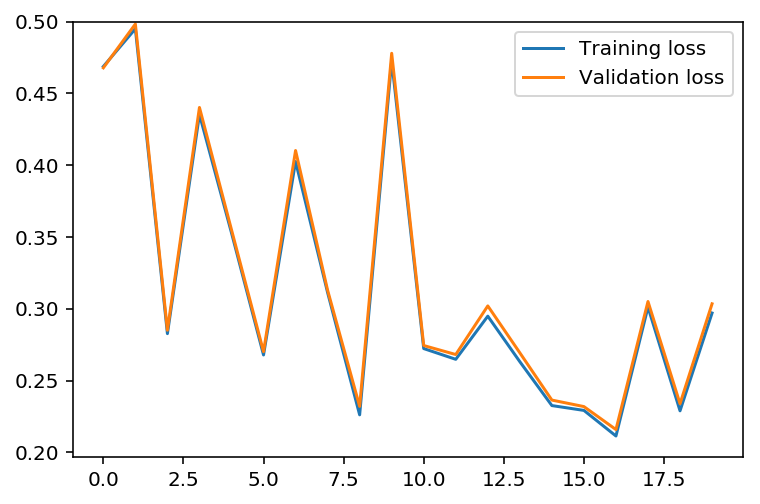

In [126]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
plt.ylim(ymax=0.5)